In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
# !unzip dataset.zip

In [5]:
train_path="dataset/train"
test_path="dataset/test"

In [6]:
# os.remove("dataset/not_logging/.ipynb_checkpoints")
# os.remove("/content/dataset/train/not_logging/.ipynb_checkpoints")
import shutil
for root, subdirs, files in os.walk('.'):
    for d in subdirs:
        if d == ".ipynb_checkpoints":
            shutil.rmtree(os.path.join(root, d))

In [7]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):
        

        image_path=sub_path+"/"+img
        # print("img :", image_path)

        img_arr=cv2.imread(image_path)
      
        img_arr=cv2.resize(img_arr,(224,224))
        
        x_train.append(img_arr)

In [8]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):
        print("img : ", img)

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

img :  indian village school campus_4.jpeg
img :  indian village school campus_7.jpeg
img :  indian village school campus_6.jpeg
img :  indian village school campus_3.jpeg
img :  indian village school campus_5.jpeg
img :  water logging in school_5.jpeg
img :  water logging in school_4.jpeg
img :  water logging in school_3.jpeg
img :  water logging in school_7.png
img :  water logging in school_6.jpeg


In [9]:
train_x=np.array(x_train)
test_x=np.array(x_test)

In [10]:
train_x=train_x/255.0
test_x=test_x/255.0

In [11]:
train_x.shape

(89, 224, 224, 3)

In [12]:
test_x.shape

(10, 224, 224, 3)

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 89 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [15]:
train_y=training_set.classes
test_y=test_set.classes

In [16]:
training_set.class_indices
train_y.shape,test_y.shape

((89,), (10,))

In [17]:
IMAGE_SIZE = [224, 224]

In [18]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(2, activation='softmax')(x)

80134624/80134624 [==============================] - 1s 0us/step


In [19]:
model = Model(inputs=vgg.input, outputs=prediction)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [23]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(test_x,test_y),
  epochs=30,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/30
3/3 [==============================] - 82s 27s/step - loss: 1.8908 - accuracy: 0.4944 - val_loss: 1.2316 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 77s 26s/step - loss: 1.1504 - accuracy: 0.5281 - val_loss: 0.6544 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 76s 27s/step - loss: 0.3182 - accuracy: 0.8427 - val_loss: 0.7913 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 76s 26s/step - loss: 0.4432 - accuracy: 0.7978 - val_loss: 0.2454 - val_accuracy: 0.9000
Epoch 5/30
3/3 [==============================] - 76s 26s/step - loss: 0.0839 - accuracy: 0.9663 - val_loss: 0.8416 - val_accuracy: 0.6000
Epoch 6/30
3/3 [==============================] - 76s 26s/step - loss: 0.1707 - accuracy: 0.9326 - val_loss: 0.7310 - val_accuracy: 0.6000
Epoch 7/30
3/3 [==============================] - 76s 26s/step - loss: 0.0611 - accuracy: 0.9775 - val_loss: 0.3037 - val_accuracy: 0.9000
Epoch 8/30
3/3 [===========

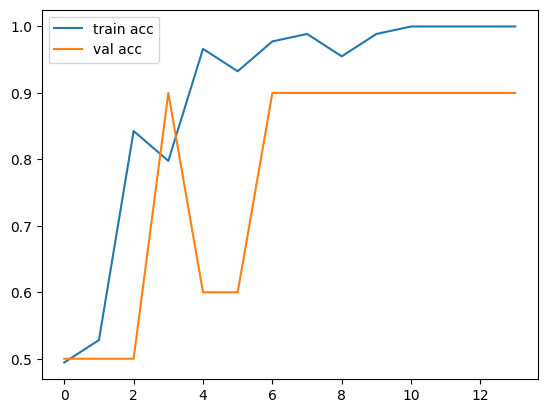

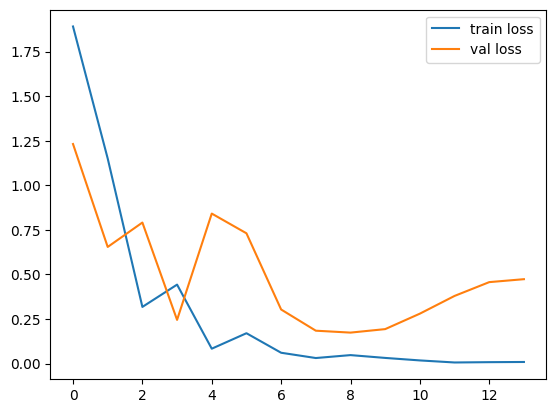

In [24]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()
